The Hull–White short‐rate evolves as

$$
dr(t) \;=\; \lambda\bigl(\theta(t)-r(t)\bigr)\,dt \;+\; \eta\,dW_r^{\mathbb{Q}}(t),
\quad r(0)=r_0,
$$

where:

- $\lambda$ is the mean‐reversion speed,  
- $\theta(t)$ is the time‐dependent long‐term level,  
- $\eta$ is the short‐rate volatility,  
- $W_r^{\mathbb{Q}}(t)$ is a standard Brownian motion under measure $\mathbb{Q}$.

For our prototype notebook, we keep it simple and use Hull-White model with a **constant** long-term $\theta$


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
r_0      = 0.03    # initial short rate r(0)
lambd   = 1.0     # mean‑reversion speed λ
theta   = 0.04    # constant long‑term mean θ
eta     = 0.01    # volatility η
T       = 1.0     # horizon in years
n_steps = 252     # number of time steps
n_paths = 50      # number of Monte Carlo paths
dt      = T / n_steps  # time increment Δt


In [4]:
np.random.seed(123)

# Pre‑allocate array for rates: shape = (n_paths, n_steps+1)
r = np.zeros((n_paths, n_steps+1))
r[:, 0] = r_0

# Time grid for plotting
time = np.linspace(0, T, n_steps+1)

# Simulate short‑rate paths
for i in range(n_steps):
    dW = np.sqrt(dt) * np.random.randn(n_paths)            # Brownian increments
    dr = lambd * (theta - r[:, i]) * dt + eta * dW         # dr = lambda*(theta − r)*dt + eta*dW
    r[:, i+1] = r[:, i] + dr                               # r_{t+dt}


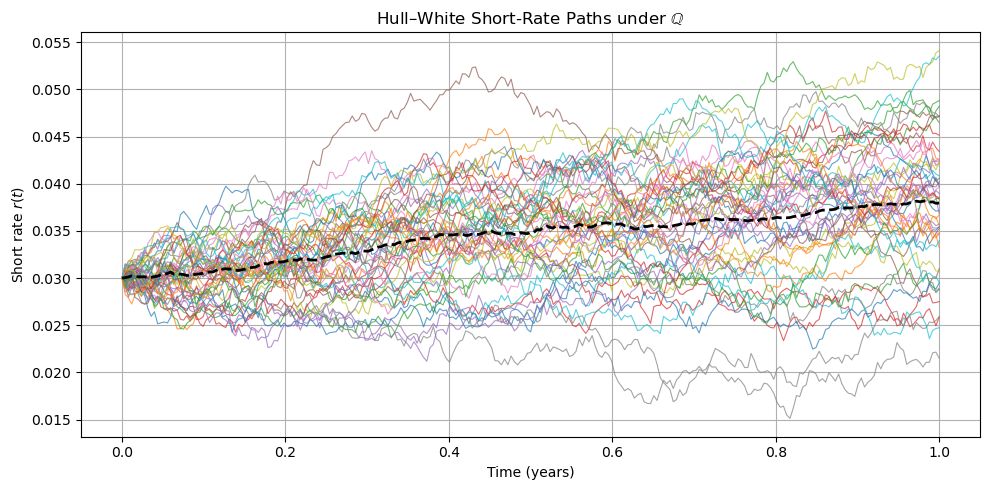

In [7]:
plt.figure(figsize=(10, 5))
for path in r:
    plt.plot(time, path, lw=0.8, alpha=0.7)
plt.plot(time, r.mean(axis=0), 'k--', lw=2, label='mean')

plt.title(r"Hull–White Short‑Rate Paths under $\mathbb{Q}$")
plt.xlabel("Time (years)")
plt.ylabel("Short rate $r(t)$")
plt.grid(True)
plt.tight_layout()
plt.show()

- **Mean Reversion:** 

  All paths start at the initial rate $r(0)=0.03$, then drift back toward the long‑term mean $\theta=0.04$.  
  This demonstrates the OU‑type pull of the term  
  $$\lambda\bigl(\theta - r(t)\bigr)\,. $$

- **Volatility:**  

  With $\eta=0.01$, the one‑step shocks are  
  $$\eta\sqrt{\Delta t}\;\approx\;0.01\sqrt{\tfrac{1}{252}}\;\approx\;0.00063$$  
  i.e. about **6.3 bp**, which matches the early path spread.

- **Dispersion Over Time:**  

  The stationary standard deviation is  
  $$\sqrt{\tfrac{\eta^2}{2\lambda}} \;=\;\tfrac{0.01}{\sqrt{2}}\;\approx\;0.0071$$  
  i.e. about **71 bp**, so by $T=1$ most rates cluster within $\theta\pm1\,SD = 4\%\pm0.71\%$. The range is $[3.29\%,\,4.71\%]$.

- **Practical Implication:**  

  Expressing rate moves in basis points emphasizes how small volatilities translate into economically meaningful shocks,  
  which is crucial for pricing rate‑sensitive derivatives (caps, floors, swaptions) and for XVA discounting.  

**Next steps**  
1. Refactor this inline simulation into a `HullWhiteModel` class in `models/hull_white.py`.  
2. Update this notebook to import and use the new class, replacing inline loops.  
3. Integrate stochastic rate paths into the `FXSimulator` for joint spot + rate simulation.
